Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Read the text file into a pandas DataFrame
automobile_df = pd.read_csv('automobile.txt')

# Display the first few rows of the DataFrame
automobile_df.head()

# Display the full list of column names
print(automobile_df.columns)


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


### Data Cleansing - Identify columns that are redundant or unnecessary. 

In [19]:
# Select columns to keep
columns_to_keep = ['fuel-type', 'aspiration', 'drive-wheels', 'wheel-base', 'length', 'width', 'height',
                   'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
                   'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Update the DataFrame with selected columns
automobile_df = automobile_df[columns_to_keep]

print(automobile_df.columns)



Index(['fuel-type', 'aspiration', 'drive-wheels', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


#### Remove any duplicate rows

In [35]:
# Remove duplicate rows
automobile_df.drop_duplicates(inplace=True)

# Check for duplicate rows
if automobile_df.duplicated().any():
    print("Duplicate rows exist.")
else:
    print("No duplicate rows.")


No duplicate rows.


#### Remove rows with missing data 

In [21]:
# Load the DataFrame from the CSV file
automobile_df = pd.read_csv('automobile.txt')

# Remove rows with missing data
automobile_df.dropna(inplace=True)

# Verify the removal by checking if there are any missing values left
print(automobile_df.isnull().any())

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects.

In [33]:
# Replace '?' with NaN
automobile_df['price'] = automobile_df['price'].replace('?', np.nan)

# Convert 'price' column to numeric
automobile_df['price'] = pd.to_numeric(automobile_df['price'])

# Check data types after replacement and conversion
print(automobile_df.dtypes)

# Check for NaN values in 'price' column
print(automobile_df['price'].isnull().sum())




symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object
4


On checking the dataset,the `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [26]:
def parse_col_json(df, column, key):
    """
    Convert JSON-formatted data in a DataFrame column into a list of strings.

    Args:
        df (DataFrame): Input DataFrame.
        column (str): Name of the column to be processed.
        key (str): Name of the dictionary key to extract.

    Returns:
        DataFrame: Copy of the input DataFrame with the specified column modified.
    """
    df = df.copy()  # Avoid modifying the original DataFrame
    for index, value in zip(df.index, df[column]):
        try:
            values_list = [item[key] for item in json.loads(value)]
            df.at[index, column] = values_list
        except (json.JSONDecodeError, TypeError):
            # Handle JSON decoding errors or empty values
            df.at[index, column] = []
    return df


In [27]:
# Inspect flattened data
automobile_df.sample(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
79,1,161,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689


In [30]:
# Locate automobiles in the 'make' column
make_automobile = automobile_df.groupby('make').size().reset_index(name='count')

#Very the above action took place
print(make_automobile.head())



          make  count
0  alfa-romero      3
1         audi      7
2          bmw      8
3    chevrolet      3
4        dodge      9


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Show the 'engine-size' and 'price' of the top 5 most expensive automobiles, sorted by 'price' in descending order


In [44]:
# Show the 'engine-size' and 'price' of the top 5 most expensive automobiles, sorted by 'price' in descending order
# and then by 'engine-size' in ascending order.

sorted_df = automobile_df.sort_values(by=['price', 'engine-size'], ascending=[False, True])

# Select the top 5 rows
top_5_rows = sorted_df.head(5)

# Display the result
print(top_5_expensive_automobile[['engine-size', 'price']])



     engine-size    price
74           304  45400.0
16           209  41315.0
73           308  40960.0
128          194  37028.0
17           209  36880.0


#### What are he top 5 rows sorted by price in descending order?

In [46]:
# Select the top 5 rows sorted by price in descending order
top_5_expensive_automobile = sorted_df.head(5)

# Display the body style along with make and price of the top 5 most expensive vehicles
print(top_5_expensive_automobile[['make', 'price', 'body-style']])



              make    price   body-style
74   mercedes-benz  45400.0      hardtop
16             bmw  41315.0        sedan
73   mercedes-benz  40960.0        sedan
128        porsche  37028.0  convertible
17             bmw  36880.0        sedan


#### Find the most popular most popular body style

In [49]:
# Determine most popular body style
most_popular_body_style = automobile_df['body-style'].value_counts().idxmax()

print("The most popular body style is:", most_popular_body_style)



The most popular body style is: sedan


#### Determine most common horsepower

In [51]:
# Determine most common horsepower
most_popular_horsepower = automobile_df['horsepower'].value_counts().idxmax()

print("The most common horsepower is:", most_popular_horsepower)


The most popular horsepower is: 68


#### Determine the average price of the most common horsepower

In [68]:
# Determine the price of the most common horsepower
most_common_horsepower = automobile_df['horsepower'].value_counts().idxmax()

# Filter dataframe to include only rows with the most common horsepower
df_most_common_horsepower = automobile_df[automobile_df['horsepower'] == most_common_horsepower]

# Calculate the mean price of the filtered dataframe
mean_price_most_common_horsepower = df_most_common_horsepower['price'].mean()

# Define the mean price in USD
mean_price_most_common_horsepower_zar = f"USD {mean_price_most_common_horsepower_rounded:.2f}"

print("The average price of vehicles with the most common horsepower (", most_common_horsepower, ") is:", mean_price_most_common_horsepower_zar)


The average price of vehicles with the most common horsepower ( 68 ) is: USD 6965.42


<Figure size 1000x600 with 0 Axes>

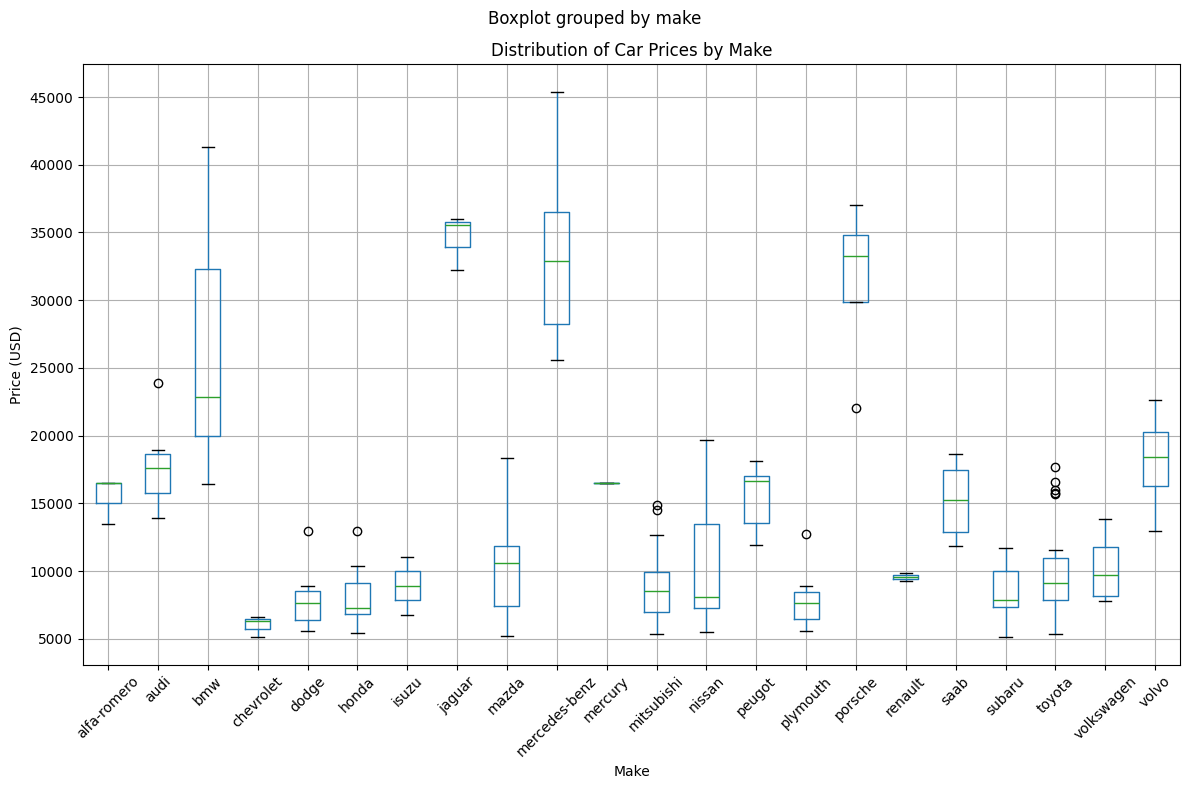

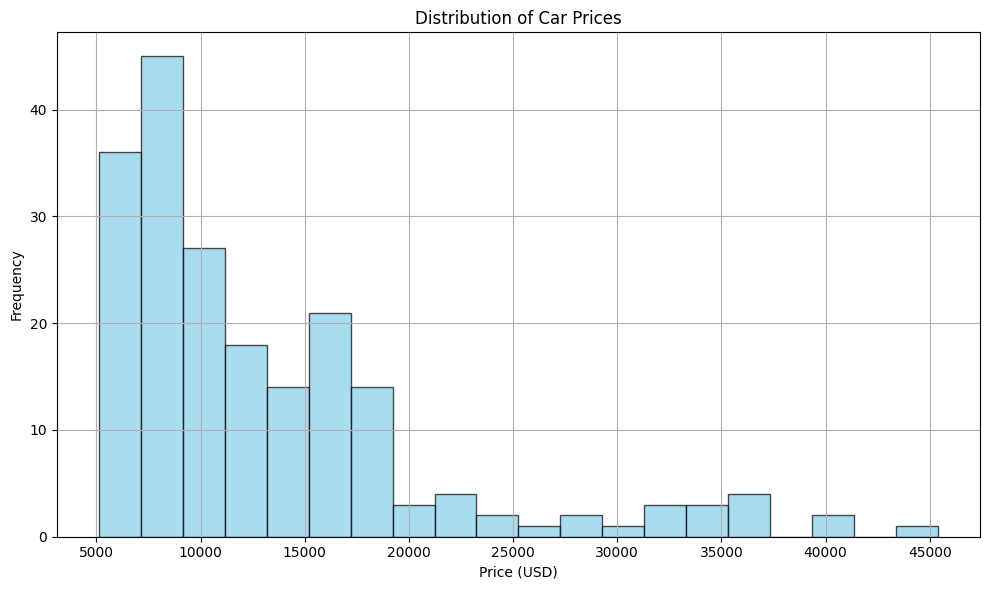

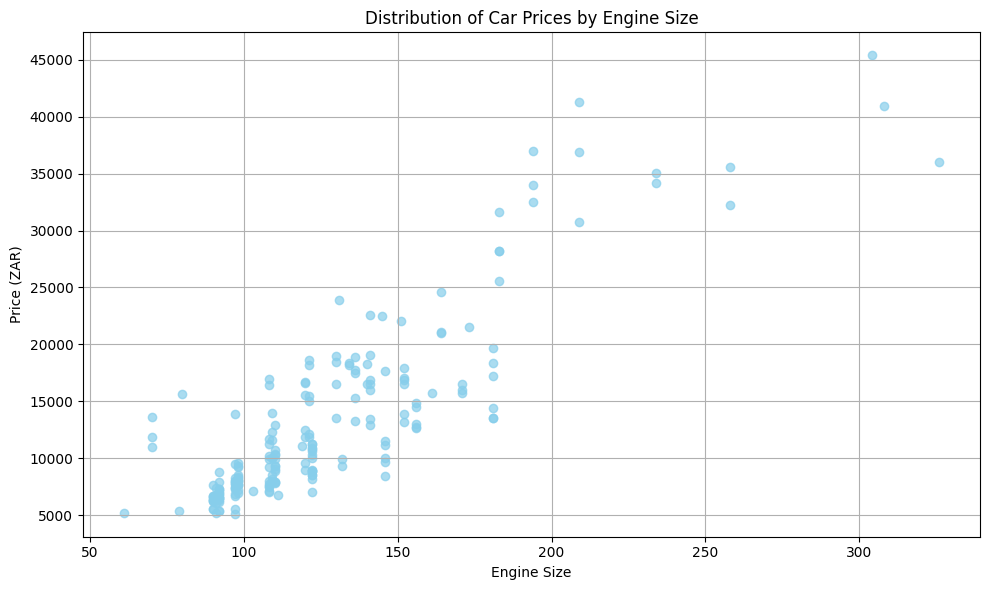

In [72]:
# Generate three different interesting visualisations with a data story.

# Visualization 1: Distribution of Car Prices by Make
plt.figure(figsize=(10, 6))
automobile_df.boxplot(column='price', by='make', figsize=(12, 8), rot=90)
plt.title('Distribution of Car Prices by Make')
plt.xlabel('Make')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Distribution of Car Prices by Horsepower using Histogram
plt.figure(figsize=(10, 6))
plt.hist(automobile_df['price'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualization 3: Distribution of Car Prices by Engine-size using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(automobile_df['engine-size'], automobile_df['price'], alpha=0.7, color='skyblue')
plt.title('Distribution of Car Prices by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price (ZAR)')
plt.grid(True)
plt.tight_layout()
plt.show()
